# Objectifs

Les objectifs de la lecon sont les suivants:
* Enoncer H0 et H1 pour chaque test
* Calculer en Python les p-valeurs
* Interpréter les résultats

# Importer les libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Data
from sklearn import datasets

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importer les données

In [2]:
# Loader les données
iris = datasets.load_iris()

# Obtenir les features
features = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names
)
# Obtenir la target
target = pd.DataFrame(
    data=iris.target,
    columns=["species"]
)
def target_converter(sp):
    """Apply strings to integers for the targets."""
    if sp == 0:
        return "setosa"
    elif sp == 1:
        return "versicolor"
    else:
        return "virginica"
target["species"] = target["species"].apply(target_converter)

# Concaténer les features et la target dans une meme dataframe
data = pd.concat([features, target], axis=1)

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# EDA rapide

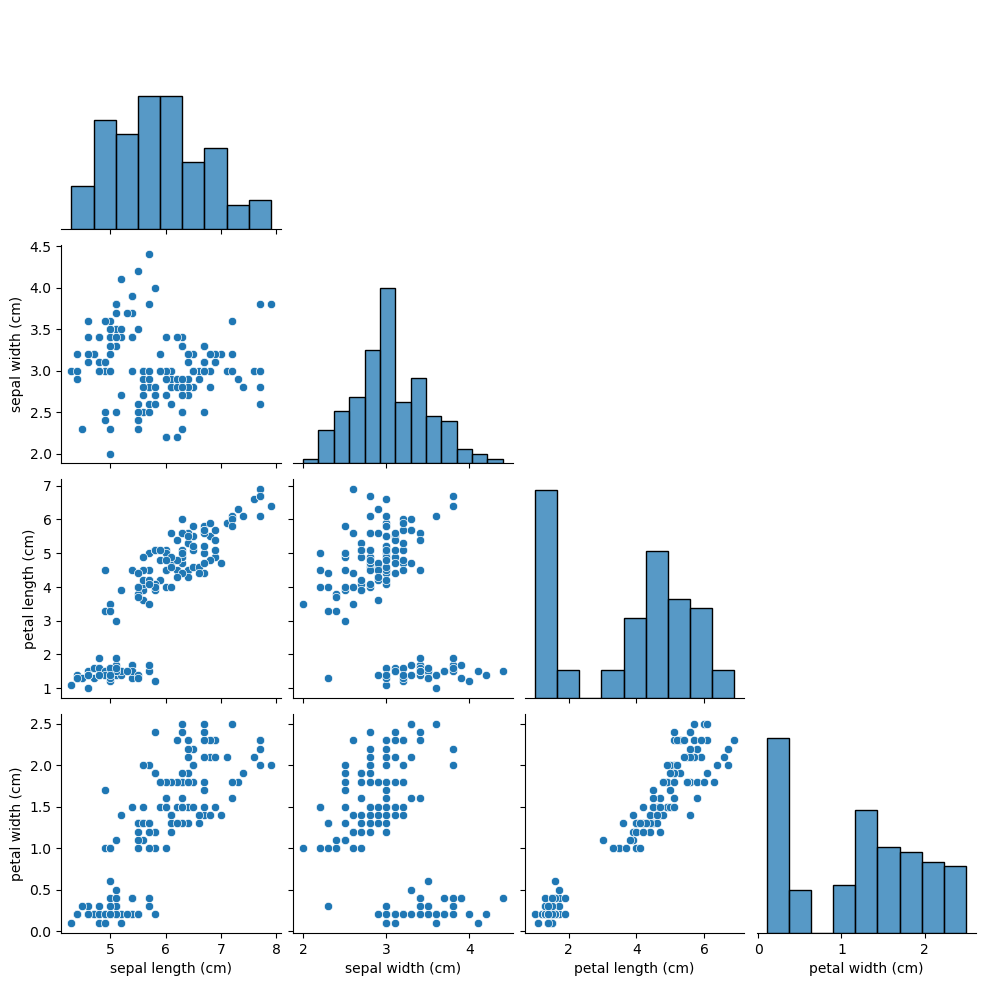

In [3]:
# Visualisons quelques scatter plots
sns.pairplot(
    data=data.drop(columns=["species"]),
    corner=True
)
plt.show()

# t-test corrélation

Rappel de la formule pour calculer la statistique t pour la corrélation:
$$ t = r \sqrt{\frac{n - 2}{1 - r^2}} $$
et les *degrés de liberté* sont n-2.

### La corrélation est-elle significative entre `la longueur des sépales (cm)` et `la longueur des pétales (cm)` dans la population?

$H_0$: $\rho$ = 0, il n'y a pas de corrélation entre `la longueur des sépales (cm)` et `la longueur des pétales (cm)` dans la population.

$H_1$: $\rho$ $\ne$ 0, il y a une corrélation significative entre `la longueur des sépales (cm)` et `la longueur des pétales (cm)` dans la population.

Les assumptions sont validées:
* Les variables sont bel et bien quantitatives et proviennent d'un échantillon aléatoire.
* Les variables sont approximativement liées linéairement selon le scatter plot ci-dessus.
* Il n'y a pas de valeur(s) aberrante(s).
* On assume que les variables suivent une distribution normale dans la population.

In [4]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# On crée les variables dont nous avons besoin
var1 = data["sepal length (cm)"]
var2 = data["petal length (cm)"]
r = var1.corr(var2) # la corrélation entre les 2 variables
n = len(var1) # la taille de l'échantillon

print(f"La corrélation entre `sepal length (cm)` et `petal length (cm)` est de {r}.")
print(f"L'échantillon est de taille {n}.")

La corrélation entre `sepal length (cm)` et `petal length (cm)` est de 0.8717537758865829.
L'échantillon est de taille 150.


In [6]:
# On calcule la statistique t 
t = r * np.sqrt((n - 2) / (1 - r**2))

print(f"La statistique t est: {t}.")

La statistique t est: 21.646019345759743.


In [7]:
# On calcule la p-valeur
p_valeur = stats.t.cdf(-abs(t), df=n-2)*2
alpha = 0.05 # seuil

print("La p-valeur est:", p_valeur)

# Si p-valeur < alpha, on rejette l'hypothèse nulle
if p_valeur < alpha:
    print(f"Avec un seuil alpha à {alpha}, on rejette l'hypothèse nulle.")
    print("Il y a une corrélation significative entre `sepal length (cm)` et `petal length (cm)` dans la population.")
# Sinon, on ne rejette pas l'hypothèse nulle
else:
    print(f"Avec un seuil alpha à {alpha}, on ne rejette pas l'hypothèse nulle.")
    print("Il n'y a pas de corrélation entre `sepal length (cm)` et `petal length (cm)` dans la population.")

La p-valeur est: 1.0386674194499307e-47
Avec un seuil alpha à 0.05, on rejette l'hypothèse nulle.
Il y a une corrélation significative entre `sepal length (cm)` et `petal length (cm)` dans la population.


La fonction [`stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) de SciPy permet de faire ce t-test de façon automatique en une ligne.

In [8]:
# En 1 ligne de code
r, p_valeur = stats.pearsonr(
    var1, # `sepal length (cm)`
    var2 # `petal length (cm)`
)

print(f"La corrélation entre `sepal length (cm)` et `petal length (cm)` est de {r}.")

print("\n") # sauter une ligne

print("La p-valeur est:", p_valeur)

# Si p-valeur < alpha, on rejette l'hypothèse nulle
if p_valeur < alpha:
    print(f"Avec un seuil alpha à {alpha}, on rejette l'hypothèse nulle.")
    print("Il y a une corrélation significative entre `sepal length (cm)` et `petal length (cm)` dans la population.")
# Sinon, on ne rejette pas l'hypothèse nulle
else:
    print(f"Avec un seuil alpha à {alpha}, on ne rejette pas l'hypothèse nulle.")
    print("Il n'y a pas de corrélation entre `sepal length (cm)` et `petal length (cm)` dans la population.")

La corrélation entre `sepal length (cm)` et `petal length (cm)` est de 0.8717537758865831.


La p-valeur est: 1.0386674194498099e-47
Avec un seuil alpha à 0.05, on rejette l'hypothèse nulle.
Il y a une corrélation significative entre `sepal length (cm)` et `petal length (cm)` dans la population.


### La corrélation est-elle significative entre `la largeur des pétales (cm)` et `la longueur des pétales (cm)` dans la population?

$H_0$: $\rho$ = 0, il n'y a pas de corrélation entre `la largeur des pétales (cm)` et `la longueur des pétales (cm)` dans la population.

$H_1$: $\rho$ $\ne$ 0, il y a une corrélation significative entre `la largeur des pétales (cm)` et `la longueur des pétales (cm)` dans la population.

In [9]:
# En 1 ligne de code
r, p_valeur = stats.pearsonr(
    data["petal width (cm)"],
    data["petal length (cm)"]
)

print(f"La corrélation entre `petal width (cm)` et `petal length (cm)` est de {r}.")

print("\n") # sauter une ligne

print("La p-valeur est:", p_valeur)

# Si p-valeur < alpha, on rejette l'hypothèse nulle
if p_valeur < alpha:
    print(f"Avec un seuil alpha à {alpha}, on rejette l'hypothèse nulle.")
    print("Il y a une corrélation significative entre `petal width (cm)` et `petal length (cm)` dans la population.")
# Sinon, on ne rejette pas l'hypothèse nulle
else:
    print(f"Avec un seuil alpha à {alpha}, on ne rejette pas l'hypothèse nulle.")
    print("Il n'y a pas de corrélation entre `petal width (cm)` et `petal length (cm)` dans la population.")

La corrélation entre `petal width (cm)` et `petal length (cm)` est de 0.9628654314027966.


La p-valeur est: 4.675003907323488e-86
Avec un seuil alpha à 0.05, on rejette l'hypothèse nulle.
Il y a une corrélation significative entre `petal width (cm)` et `petal length (cm)` dans la population.


### Bonus: exemple du cours

$H_0$: $\rho$ = 0, il n'y a pas de corrélation entre `nb cig per day` et `age of death` dans la population.

$H_1$: $\rho$ $\ne$ 0, il y a une corrélation significative entre `nb cig per day` et `age of death` dans la population.

In [10]:
# On crée les variables
nb_cig_per_day_var = np.array([5, 23, 25, 48, 17, 8, 4, 26, 11, 19, 14, 35, 29, 4, 23])
age_of_death_var = np.array([80, 78, 60, 53, 85, 84, 73, 79, 81, 75, 68, 72, 58, 92, 65])

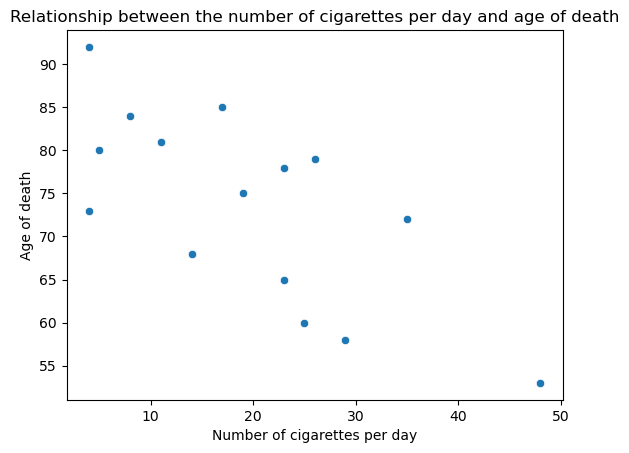

In [11]:
# On fait un scatter plot
sns.scatterplot(
    x=nb_cig_per_day_var,
    y=age_of_death_var
)
plt.title("Relationship between the number of cigarettes per day and age of death")
plt.xlabel("Number of cigarettes per day")
plt.ylabel("Age of death")
plt.show()

In [12]:
# En 1 ligne de code
r, p_valeur = stats.pearsonr(
    nb_cig_per_day_var,
    age_of_death_var
)

print(f"La corrélation entre `nb_cig_per_day_var` et `age_of_death` est de {r}.")

print("\n") # sauter une ligne

print("La p-valeur est:", p_valeur)

# Si p-valeur < alpha, on rejette l'hypothèse nulle
if p_valeur < alpha:
    print(f"Avec un seuil alpha à {alpha}, on rejette l'hypothèse nulle.")
    print("Il y a une corrélation significative entre `nb_cig_per_day_var` et `age_of_death` dans la population.")
# Sinon, on ne rejette pas l'hypothèse nulle
else:
    print(f"Avec un seuil alpha à {alpha}, on ne rejette pas l'hypothèse nulle.")
    print("Il n'y a pas de corrélation entre `nb_cig_per_day_var` et `age_of_death` dans la population.")

La corrélation entre `nb_cig_per_day_var` et `age_of_death` est de -0.7134301743865809.


La p-valeur est: 0.0028223429900712336
Avec un seuil alpha à 0.05, on rejette l'hypothèse nulle.
Il y a une corrélation significative entre `nb_cig_per_day_var` et `age_of_death` dans la population.
